In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
import imutils

In [2]:
# Load the image
image_original = cv2.imread("1.jpg")  # Replace with the path to your image

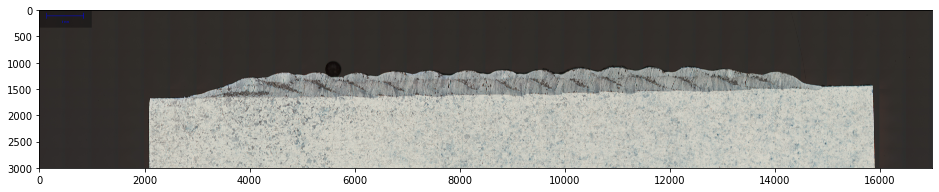

In [3]:
fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.imshow(image_original)

In [4]:
np.unique(image_original)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [6]:
hsv_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2HSV)

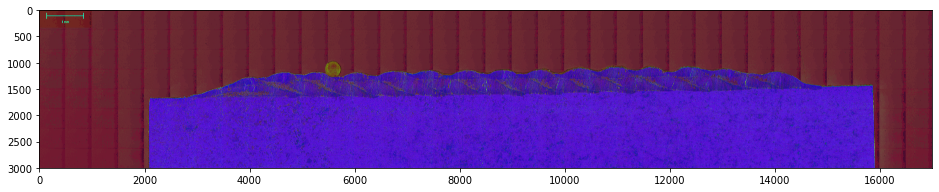

In [7]:
fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.imshow(hsv_image)

In [8]:
np.unique(hsv_image)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [9]:
np.arange(hsv_image.shape[0])

array([   0,    1,    2, ..., 2998, 2999, 3000])

In [10]:
np.arange(hsv_image.shape[1])

array([    0,     1,     2, ..., 16997, 16998, 16999])

In [12]:
hsv_image.shape

(3001, 17000, 3)

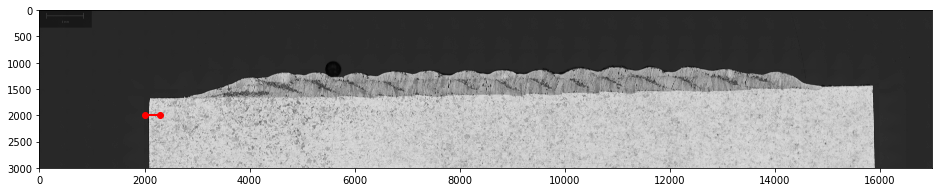

In [15]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x =[2000,2300]
y = [2000,2000]

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([2000, 2300], [2000, 2000], marker='o', linestyle='-', linewidth=2, color='red')
plt.imshow(image, cmap='gray')

In [16]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2110, 2121
y_start, y_end = 1670, 1690
R = [1,-1]

selected_portion1 = image[y_start:y_end, x_start:x_end]

In [17]:
print(selected_portion1)
selected_portion1.size
#np.prod(selected_portion1.shape)

[[ 23  20  21  18  18  19  19  18  20  25  27]
 [ 25  22  22  18  19  26  32  36  46  58  46]
 [ 25  21  14  29  19  33  78  77  59  74  87]
 [ 25  21  26  18  34  98 125  84  48  85  96]
 [ 23  20  24  30  53 109 141 144  83  56  89]
 [ 22  21  28  36  87 157 181 175 124 101 121]
 [ 26  29  30  76 144 177 181 181 162 148 140]
 [ 31  37  39 104 163 184 188 182 179 178 163]
 [ 32  40  45 137 181 194 198 196 193 195 186]
 [ 29  37  96 176 171 167 173 180 175 177 173]
 [ 23  65 156 170 165 184 190 185 179 166 190]
 [ 34  86 145 164 164 182 187 189 192 187 192]
 [ 43 110 159 182 183 193 194 195 193 186 181]
 [ 63 144 173 191 187 191 192 197 193 182 184]
 [ 76 165 193 203 193 187 186 199 200 196 199]
 [ 71 161 207 217 210 200 194 205 207 209 205]
 [ 72 166 197 208 207 204 201 212 210 213 206]
 [ 78 177 203 206 201 200 202 214 208 209 204]
 [ 72 171 202 207 192 187 198 200 200 199 203]
 [ 85 160 198 208 202 196 195 192 196 199 205]]


220

In [18]:
#All the values greater than threshold

selected_values1 = []
threshold = 105

for row in selected_portion1:
    for value in row:
        if value > threshold:
            selected_values1.append(value)

print(selected_values1)
num_selected_values = len(selected_values1)
print(num_selected_values)

[125, 109, 141, 144, 157, 181, 175, 124, 121, 144, 177, 181, 181, 162, 148, 140, 163, 184, 188, 182, 179, 178, 163, 137, 181, 194, 198, 196, 193, 195, 186, 176, 171, 167, 173, 180, 175, 177, 173, 156, 170, 165, 184, 190, 185, 179, 166, 190, 145, 164, 164, 182, 187, 189, 192, 187, 192, 110, 159, 182, 183, 193, 194, 195, 193, 186, 181, 144, 173, 191, 187, 191, 192, 197, 193, 182, 184, 165, 193, 203, 193, 187, 186, 199, 200, 196, 199, 161, 207, 217, 210, 200, 194, 205, 207, 209, 205, 166, 197, 208, 207, 204, 201, 212, 210, 213, 206, 177, 203, 206, 201, 200, 202, 214, 208, 209, 204, 171, 202, 207, 192, 187, 198, 200, 200, 199, 203, 160, 198, 208, 202, 196, 195, 192, 196, 199, 205]
137


In [19]:
#All the FIRST values greater than threshold
threshold = 105
first_values = []

for row in selected_portion1:
    found = False
    for value in row:
        if value > threshold:
            first_values.append(value)
            found = True
            break
    if not found:
        first_values.append(None)

print(first_values) #print 1 

num_first_values = len(first_values)
print(num_first_values) #print 2

[None, None, None, 125, 109, 157, 144, 163, 137, 176, 156, 145, 110, 144, 165, 161, 166, 177, 171, 160]
20


In [20]:
coordinates = []

for y, row in enumerate(selected_portion1):
    found = False
    for x, value in enumerate(row):
        if value > threshold:
            first_values.append(value)
            coordinates.append((x, y))
            found = True
            break
    if not found:
        first_values.append(None)
        coordinates.append(None)

print(first_values) #print 1 

#select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]

num_first_values = len(first_values)
print(num_first_values) #print 2

num_selected_values = len(selected_values1)
print(num_selected_values) #print 3

num_coordinates_count = len(coordinates)
print(num_coordinates_count) #print 4
print(coordinates)

[None, None, None, 125, 109, 157, 144, 163, 137, 176, 156, 145, 110, 144, 165, 161, 166, 177, 171, 160, None, None, None, 125, 109, 157, 144, 163, 137, 176, 156, 145, 110, 144, 165, 161, 166, 177, 171, 160]
40
137
17
[(6, 3), (5, 4), (5, 5), (4, 6), (4, 7), (3, 8), (3, 9), (2, 10), (2, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19)]


In [21]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2110, 2121
y_start, y_end = 1, -1

selected = image[y_start:y_end, x_start:x_end]

threshold = 105
coordinates = []

for y, row in enumerate(selected):
    found = False
    for x, value in enumerate(row):
        if value > threshold:
            coordinates.append((x, y))
            found = True
            break
    if not found:
        coordinates.append(None)

#select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]

for coord in coordinates:
    x, y = coord
    cv2.circle(image, (x, y), radius=2, color=(255, 0, 0), thickness=3)  # Draw a line at the coordinate

In [22]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2110, 2121
y_start, y_end = 100, -1

selected_portion2= image[y_start:y_end, x_start:x_end]

In [23]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

coordinates = []

for y, row in enumerate(image):
    found = False
    for x, value in enumerate(row):
        if value > threshold:
            first_values.append(value)
            coordinates.append((x, y))
            found = True
            break
    if not found:
        first_values.append(None)
        coordinates.append(None)

#select only values which are not None
coord = []
coordinates = [coord for coord in coordinates if coord is not None]

'''for coord in coordinates:
    x, y = coord
    cv2.line(image, (x, y), (x, y), (255, 0, 0), thickness=3)  # Draw a line at the coordinate'''

x, y = coord
fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([x, y], [x, y], marker='.', linestyle=':', linewidth=1, color='red')
plt.imshow(image, cmap='gray')

ValueError: not enough values to unpack (expected 2, got 0)

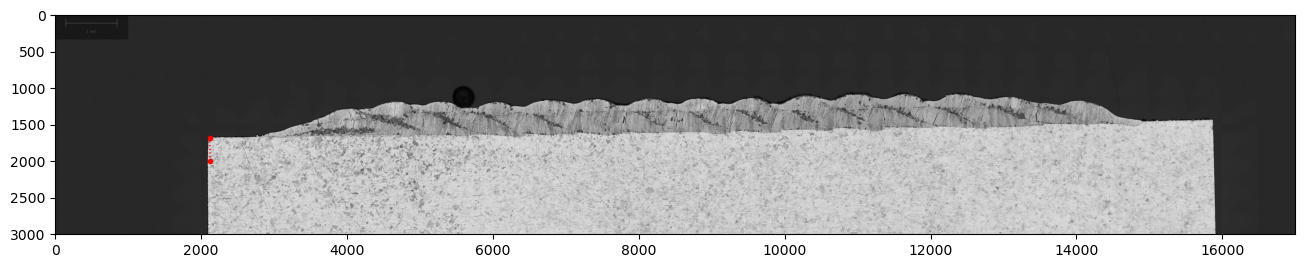

In [20]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2120, 2121
y_start, y_end = 1675, 1990

selected_portion1 = image[y_start:y_end, x_start:x_end]
selected_portion2 = image[y_start:y_end, x_start:x_end]

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([x_start, x_end], [y_start, y_end], marker='.', linestyle=':', linewidth=1, color='red')
plt.imshow(image, cmap='gray')

In [16]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

bottom_image = image == 38

cols =[1,-1]

start = np.where(bottom_image[:,cols[0]] == True)[0][0]
end = np.where(bottom_image[:,cols[1]] == True)[0][0]

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([cols[0], 3564], [start, end], marker='o', linestyle='-', linewidth=2, color='red')
plt.imshow(image_original, cmap='gray')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [89]:
bottom_image.shape[1]

3565

In [91]:
arr = []

for i in range(bottom_image.shape[1]):
    arr.append(np.where(bottom_image[:,i] == True)[0][0])

In [90]:
arr1 = []

for i in range(bottom_image.shape[0]):
    arr.append(np.where(bottom_image[:,i] == True)[0][0])

In [36]:
range(len(bottom_image.shape[1]))

TypeError: object of type 'int' has no len()

In [75]:
arr

[1196,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1088,
 1088,
 1088,
 1088,
 1088,
 1088,
 1088,
 1087,
 1087,
 1087,
 1087,
 1087,
 1087,
 1086,
 1086,
 1086,
 1086,
 1086,
 1086,
 1085,
 1085,
 1085,
 1085,
 1085,
 1085,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,

In [61]:
np.min(arr), np.max(arr)

(1002, 1196)

In [60]:
np.mean(arr)

1046.6165497896213

In [47]:
top_values = []

for i,j in zip(range(bottom_image.shape[1]), arr):
    top_values.append([i,j])

In [93]:
top_values

[[0, 1196],
 [1, 1091],
 [2, 1091],
 [3, 1091],
 [4, 1091],
 [5, 1091],
 [6, 1091],
 [7, 1091],
 [8, 1091],
 [9, 1091],
 [10, 1091],
 [11, 1091],
 [12, 1091],
 [13, 1091],
 [14, 1091],
 [15, 1091],
 [16, 1091],
 [17, 1091],
 [18, 1091],
 [19, 1091],
 [20, 1091],
 [21, 1091],
 [22, 1091],
 [23, 1091],
 [24, 1091],
 [25, 1091],
 [26, 1091],
 [27, 1091],
 [28, 1091],
 [29, 1091],
 [30, 1091],
 [31, 1091],
 [32, 1091],
 [33, 1091],
 [34, 1091],
 [35, 1091],
 [36, 1091],
 [37, 1091],
 [38, 1091],
 [39, 1091],
 [40, 1091],
 [41, 1091],
 [42, 1091],
 [43, 1090],
 [44, 1090],
 [45, 1090],
 [46, 1090],
 [47, 1090],
 [48, 1090],
 [49, 1090],
 [50, 1090],
 [51, 1090],
 [52, 1090],
 [53, 1090],
 [54, 1089],
 [55, 1089],
 [56, 1089],
 [57, 1089],
 [58, 1089],
 [59, 1089],
 [60, 1089],
 [61, 1089],
 [62, 1089],
 [63, 1088],
 [64, 1088],
 [65, 1088],
 [66, 1088],
 [67, 1088],
 [68, 1088],
 [69, 1088],
 [70, 1087],
 [71, 1087],
 [72, 1087],
 [73, 1087],
 [74, 1087],
 [75, 1087],
 [76, 1086],
 [77, 108

In [111]:
top_values1 = np.array([subarray[0] for subarray in top_values], dtype=np.float64)
top_values2 = np.array([subarray[1] for subarray in top_values], dtype=np.float64)
print(top_values1)


[0.000e+00 1.000e+00 2.000e+00 ... 3.562e+03 3.563e+03 3.564e+03]


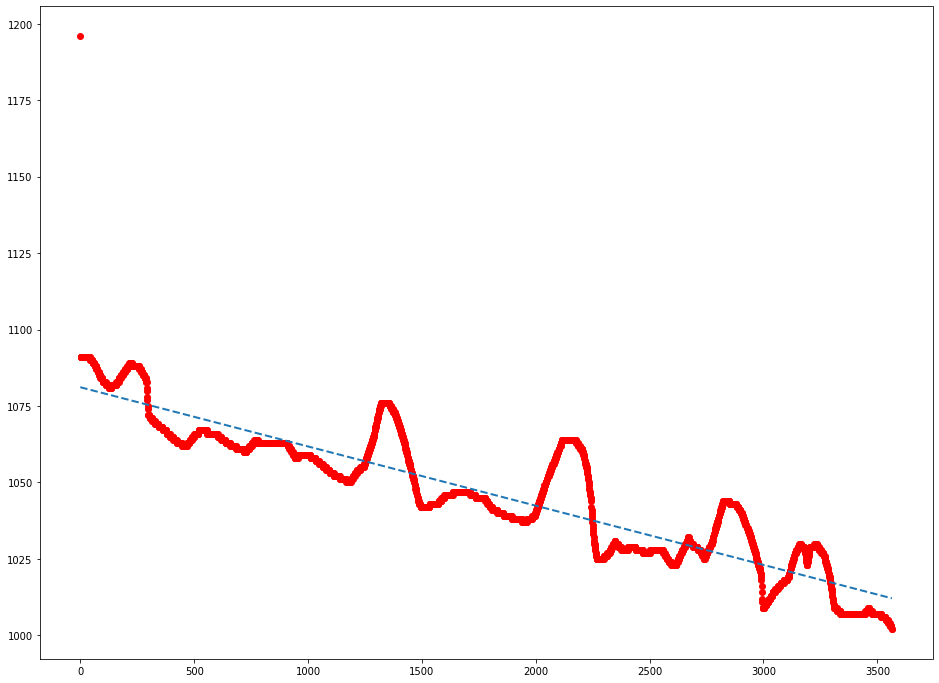

In [140]:
fig = plt.figure(figsize=(16, 12))
a, b = np.polyfit(top_values1, top_values2, 1)
#plt.plot([c], marker='o', linestyle='-', linewidth=1, color='red')
plt.scatter(top_values1, top_values2, color='red')
a1 = top_values1
a2 = a*top_values1+b
plt.plot(a1, a2, linestyle='--', linewidth=2)
#plt.plot(top_values1, a*top_values1+b)
#plt.imshow(image, cmap='gray')

In [146]:
first_value = a2[0]
last_value = a2[-1]
print(first_value, last_value)

1081.1459497089152 1012.0871498703273


In [147]:
x1, y1 = 0, 1081
x2, y2 = 3564, 1012

In [150]:
angle_radius = math.atan2(y2 - y1, x2 - x1)
angle_degree = math.degrees(angle_radius)

In [151]:
print(angle_radius, angle_degree)

-0.01935785103186327 -1.1091231645687312


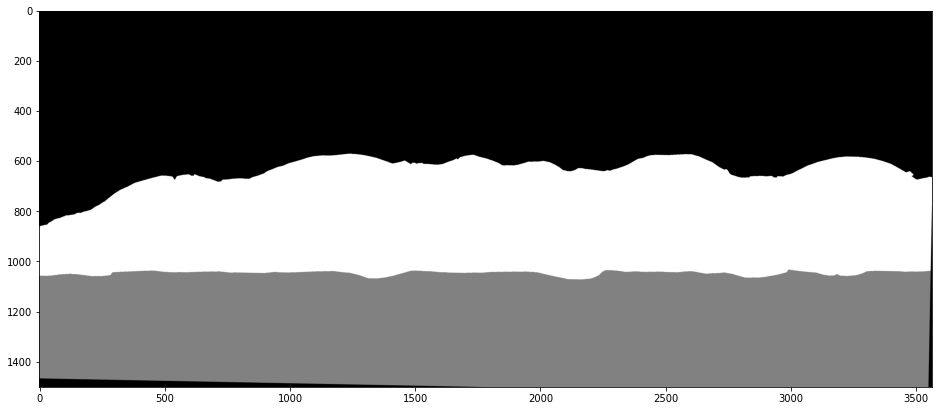

In [158]:
fig = plt.figure(figsize=(16, 12))
degree_rotate = -1.1091231645687312
rotated_image = imutils.rotate(image, angle= degree_rotate)
plt.imshow(rotated_image, cmap='gray')

In [58]:
image[:,0]

array([ 0,  0,  0, ..., 38, 38, 38], dtype=uint8)

In [71]:
# [1046]*bottom_image.shape[0]

In [80]:
arr

[1196,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1088,
 1088,
 1088,
 1088,
 1088,
 1088,
 1088,
 1087,
 1087,
 1087,
 1087,
 1087,
 1087,
 1086,
 1086,
 1086,
 1086,
 1086,
 1086,
 1085,
 1085,
 1085,
 1085,
 1085,
 1085,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,

In [81]:
np.argmin(arr)

3563

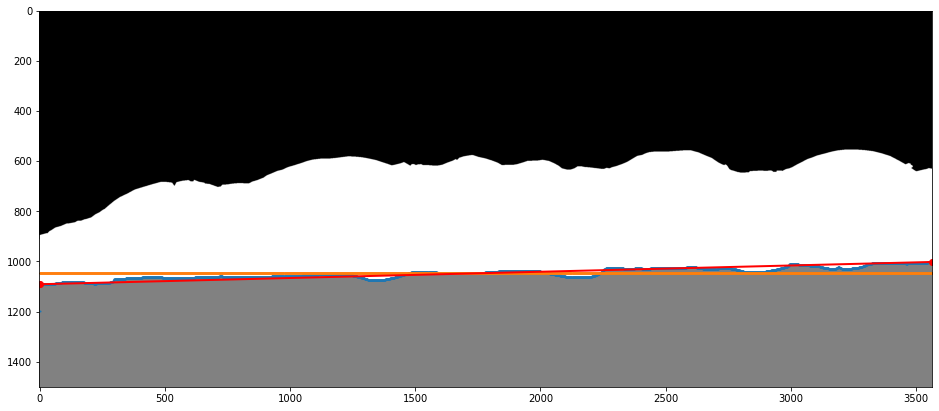

In [127]:
fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([cols[0], 3564], [start, end], marker='o', linestyle='-', linewidth=2, color='red')
plt.scatter(range(bottom_image.shape[1]), arr, s=1)
plt.scatter(range(bottom_image.shape[1]), [1046]*(bottom_image.shape[1]), s=1)
plt.imshow(image, cmap='gray')

In [87]:
bottom_image[1,-1]

False

In [88]:
b=np.where(bottom_image==True)

In [90]:
np.argmin(b[1])
b[0][np.argmin(b[1])]

1196

In [80]:
np.where(bottom_image[:,cols[1]] == True)

(array([1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
        1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
        1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
        1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045,
        1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056,
        1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067,
        1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078,
        1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089,
        1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100,
        1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111,
        1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
        1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133,
        1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144,
        1145, 1146, 1147, 1148, 1149, 

In [81]:
np.arange(bottom_image.shape[1])

array([   0,    1,    2, ..., 3562, 3563, 3564])

In [82]:
np.arange(bottom_image.shape[0])

array([   0,    1,    2, ..., 1498, 1499, 1500])

In [6]:
np.unique(image)

array([ 0, 38, 75], dtype=uint8)

In [7]:
image.shape

(1501, 3565)

In [8]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

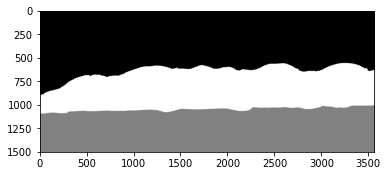

In [9]:
plt.imshow(image, cmap='gray')

In [23]:
tick_params(labeltop=True, labelright=True)

NameError: name 'tick_params' is not defined

In [10]:
image.shape

(1501, 3565)

In [11]:
np.unique(image)

array([ 0, 38, 75], dtype=uint8)

In [12]:
image.shape

(1501, 3565)

In [13]:
image

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38]], dtype=uint8)

In [14]:
image_bottom = image[image == 75]

In [15]:
image_bottom.shape

(1464927,)

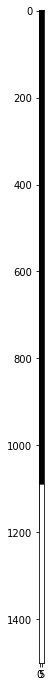

In [16]:
fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.imshow((image == 38)[:,:10], cmap='gray')

In [21]:
bottom_image = image == 38

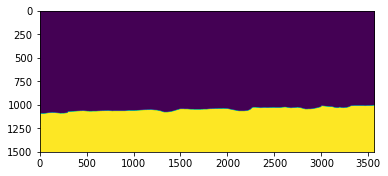

In [22]:
plt.imshow(bottom_image)

In [40]:
np.where(bottom_image[:,1] == True)

(array([1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101,
        1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112,
        1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123,
        1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134,
        1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145,
        1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156,
        1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167,
        1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178,
        1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189,
        1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200,
        1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211,
        1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222,
        1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233,
        1234, 1235, 1236, 1237, 1238, 

In [49]:
np.where(bottom_image[1:,:] == True)

(array([1001, 1001, 1002, ..., 1499, 1499, 1499], dtype=int64),
 array([3563, 3564, 3555, ..., 3562, 3563, 3564], dtype=int64))

In [ ]:
np.where(bottom_image[1:,:] == True)

(array([1001, 1001, 1002, ..., 1499, 1499, 1499], dtype=int64),
 array([3563, 3564, 3555, ..., 3562, 3563, 3564], dtype=int64))

In [ ]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

bottom_image = image == 38

start = np.where(bottom_image[:,1] == True)[0][0]
end = np.where(bottom_image[:,-1] == True)[0][0]

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([0, 3564], [start, end], marker='o', linestyle='-', linewidth=2, color='red')
plt.imshow(image_original, cmap='gray')